In [75]:
import pandas as pd

In [76]:
df = pd.read_csv('spam_clean.csv')

In [3]:
df.shape

(5572, 2)

In [4]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [5]:
from prepare import basic_clean, lemmatize, remove_stopwords

In [6]:
def clean(text):
    return remove_stopwords(lemmatize(basic_clean(text)))

clean('Good morning Ada! We are doing data exploration!')

'good morning ada data exploration'

In [7]:
df.text = df.text.apply(clean)

In [8]:
df.text.head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah dont think go usf life around though
Name: text, dtype: object

In [9]:
all_text = ' '.join(df.text)
spam_text = ' '.join(df[df.label == 'spam'].text)
ham_text = ' '.join(df[df.label == 'ham'].text)
all_text = clean(all_text)
spam_text = clean(spam_text)
ham_text = clean(ham_text)

In [10]:
pd.Series(all_text.split()).value_counts()

u                  1197
call                608
2                   484
im                  462
get                 399
ur                  384
go                  304
4                   294
dont                280
free                280
ok                  277
ltgt                276
know                267
come                247
like                245
day                 242
got                 238
ill                 237
good                235
wa                  234
time                233
text                216
want                213
love                203
send                194
need                182
one                 180
today               172
going               171
r                   166
                   ... 
4years                1
someonone             1
overemphasiseor       1
niate                 1
ucall                 1
cereal                1
tlpcoukreward         1
thet                  1
sterm                 1
problum               1
7romantic       

In [11]:
ham_freq = pd.Series(ham_text.split()).value_counts()
spam_freq = pd.Series(spam_text.split()).value_counts()
all_freq = pd.Series(all_text.split()).value_counts()

In [12]:
word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
word_counts.columns = ['all', 'spam', 'ham']
word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [13]:
word_counts.sort_values(by='all', ascending=False)

,all,spam,ham
u,1197,163,1034
call,608,367,241
2,484,176,308
im,462,13,449
get,399,85,314
ur,384,144,240
go,304,31,273
4,294,122,172
dont,280,23,257
free,280,220,60


In [14]:
word_counts.assign(p_spam=word_counts.spam / word_counts['all'],p_ham=word_counts.ham / word_counts['all'])

,all,spam,ham,p_spam,p_ham
0,3,3,0,1.000000,0.000000
008704050406,2,2,0,1.000000,0.000000
0089my,1,1,0,1.000000,0.000000
0121,1,1,0,1.000000,0.000000
01223585236,1,1,0,1.000000,0.000000
01223585334,2,2,0,1.000000,0.000000
0125698789,1,0,1,0.000000,1.000000
02,1,1,0,1.000000,0.000000
020603,4,4,0,1.000000,0.000000
0207,3,3,0,1.000000,0.000000


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

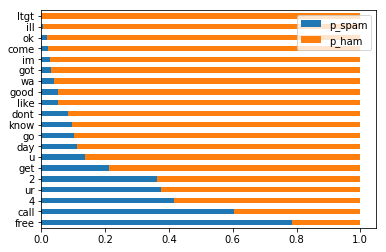

In [16]:
word_counts.assign(p_spam=word_counts.spam / word_counts['all'],p_ham=word_counts.ham / word_counts['all'])\
    .sort_values(by='all')\
    .tail(20)\
    [['p_spam', 'p_ham']]\
    .sort_values(by='p_ham')\
    .plot.barh(stacked=True)

In [17]:
word_counts[(word_counts.spam > 10) & (word_counts.ham > 10)]\
    .assign(ratio=lambda df: df.spam/df.ham)\
    .sort_values(by='ratio')

,all,spam,ham,ratio
im,462,13,449,0.028953
good,235,12,223,0.053812
like,245,13,232,0.056034
need,182,11,171,0.064327
time,233,19,214,0.088785
dont,280,23,257,0.089494
think,146,14,132,0.106061
know,267,26,241,0.107884
great,111,11,100,0.110000
pls,109,11,98,0.112245


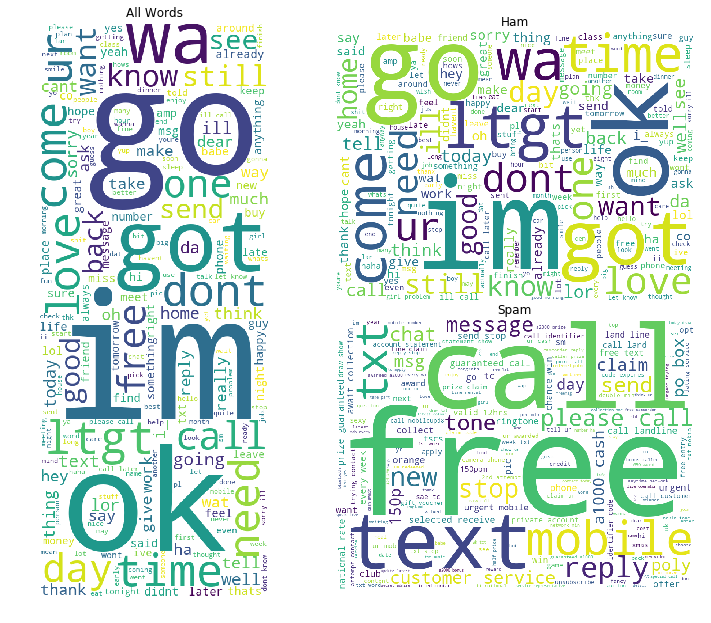

In [18]:
from wordcloud import WordCloud

all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(all_text)
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(ham_text)
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(spam_text)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')

In [19]:
import nltk

list(nltk.ngrams('Mary had a little lamb'.split(), 3))

[('Mary', 'had', 'a'), ('had', 'a', 'little'), ('a', 'little', 'lamb')]

In [20]:
pd.Series(nltk.ngrams(all_text.split(), 2)).value_counts().head(20)

(please, call)         53
(call, later)          52
(ill, call)            48
(u, r)                 44
(let, know)            41
(r, u)                 40
(sorry, ill)           39
(dont, know)           38
(contact, u)           34
(new, year)            32
(good, morning)        31
(wan, 2)               31
(customer, service)    29
(u, get)               26
(take, care)           26
(po, box)              25
(im, going)            24
(a1000, cash)          23
(guaranteed, call)     23
(u, know)              23
dtype: int64

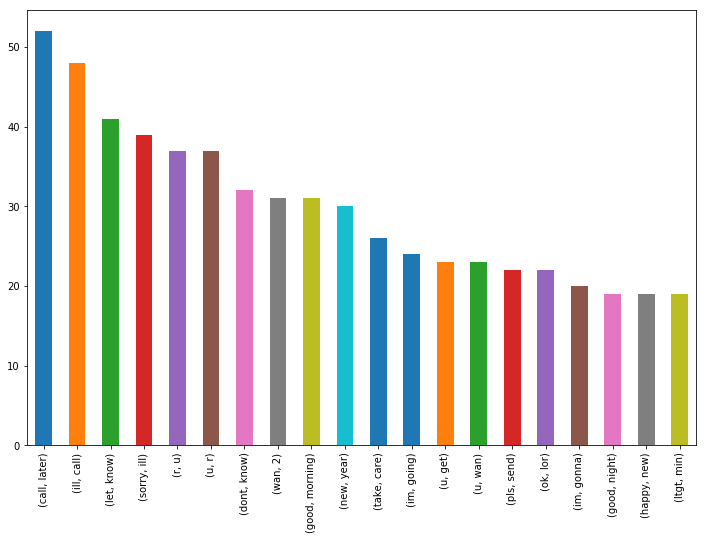

In [21]:
pd.Series(nltk.bigrams(ham_text.split())).value_counts().head(20).plot.bar(figsize=(12,8))

In [22]:
import acquire
import prepare

In [23]:
blogs = acquire.get_blog_articles()
news = acquire.get_news_articles()

In [24]:
df_blog = pd.DataFrame(blogs)
df_news = pd.DataFrame(news)

In [25]:
df_blog.head()

,content,title
0,\nThe rumors are true! The time has arrived. C...,Codeup’s Data Science Career Accelerator is Here!
1,\nBy Dimitri Antoniou and Maggie Giust\nData S...,Data Science Myths
2,"\nBy Dimitri Antoniou\nA week ago, Codeup laun...",Data Science VS Data Analytics: What’s The Dif...
3,\n10 Tips to Crush It at the SA Tech Job Fair\...,10 Tips to Crush It at the SA Tech Job Fair
4,"[ , , Is the programming bootcamp model in dan...",Competitor Bootcamps Are Closing. Is the Model...


In [26]:
type(df_blog)

pandas.core.frame.DataFrame

In [27]:
df_blog.content = df_blog.content.apply(clean)
df_news.content = df_news.content.apply(clean)

In [28]:
labels = pd.concat([df_news.category.value_counts(),
                    df_news.category.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
technology,25,0.255102
business,25,0.255102
entertainment,24,0.244898
sports,24,0.244898


In [29]:
all_news = ' '.join(df_news.content)
tech_news = ' '.join(df_news[df_news.category == 'technology'].content)
bus_news = ' '.join(df_news[df_news.category == 'business'].content)
sports_news = ' '.join(df_news[df_news.category == 'sports'].content)
ent_news = ' '.join(df_news[df_news.category == 'entertainment'].content)

In [30]:
all_freq = pd.Series(all_news.split()).value_counts()
tech_freq = pd.Series(tech_news.split()).value_counts()
bus_freq = pd.Series(bus_news.split()).value_counts()
sports_freq = pd.Series(sports_news.split()).value_counts()
ent_freq = pd.Series(ent_news.split()).value_counts()

all_freq

said           58
ha             51
wa             39
india          24
first          23
added          22
year           22
film           19
2019           19
crore          16
u              16
also           15
world          15
buffett        13
people         12
last           12
met            12
warren         12
one            12
based          12
ceo            11
run            11
team           11
actor          11
million        10
like           10
game           10
captain        10
cup             9
monday          9
               ..
union           1
pcb             1
planned         1
competition     1
bat             1
pednekar        1
flipkart        1
vogue           1
mariano         1
guiding         1
skiing          1
house           1
nudityits       1
indoors         1
kill            1
afridis         1
awarded         1
hub             1
invested        1
resolve         1
263             1
turned          1
eden            1
favourite       1
removed   

In [31]:
news_word_counts = (pd.concat([all_freq, tech_freq, bus_freq, sports_freq, ent_freq], axis=1, sort=True))\
    .set_axis(['all', 'technology', 'business', 'sports', 'entertainment'], axis=1, inplace=False)
# word_counts = pd.concat([all_freq, spam_freq, ham_freq], sort=True, axis=1)
# word_counts.columns = ['all', 'spam', 'ham']
# word_counts = word_counts.fillna(0).apply(lambda s: s.astype(int))

In [32]:
news_word_counts = news_word_counts.fillna(0).apply(lambda s: s.astype(int))
news_word_counts.tail()

,all,technology,business,sports,entertainment
zaman,1,0,0,1,0
zimbabwe,1,0,0,1,0
ziva,1,0,0,1,0
zone,1,0,1,0,0
zozos,1,0,1,0,0


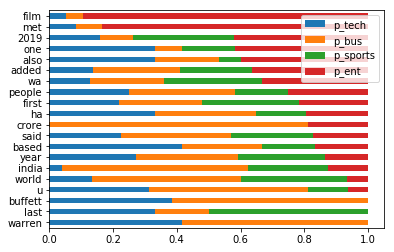

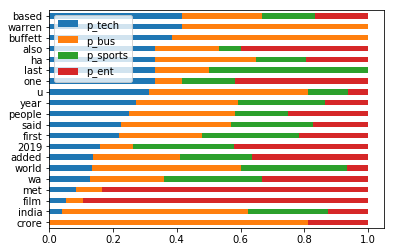

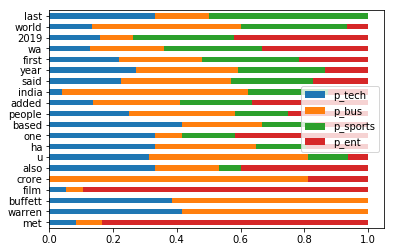

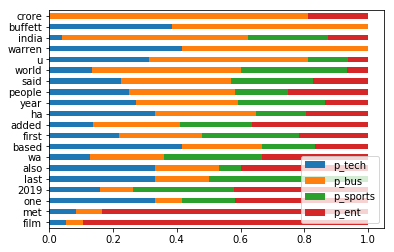

In [33]:
news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_ent')\
                        .plot.barh(stacked=True)
                        

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_tech')\
                        .plot.barh(stacked=True)

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_sports')\
                        .plot.barh(stacked=True)

news_word_counts.assign(p_tech=news_word_counts.technology / news_word_counts['all'],\
                        p_bus=news_word_counts.business / news_word_counts['all'],\
                        p_sports=news_word_counts.sports / news_word_counts['all'],\
                        p_ent=news_word_counts.entertainment / news_word_counts['all'])\
                        .sort_values(by='all', ascending=False)\
                        .head(20)\
                        [['p_tech', 'p_bus', 'p_sports', 'p_ent']]\
                        .sort_values(by='p_bus')\
                        .plot.barh(stacked=True)

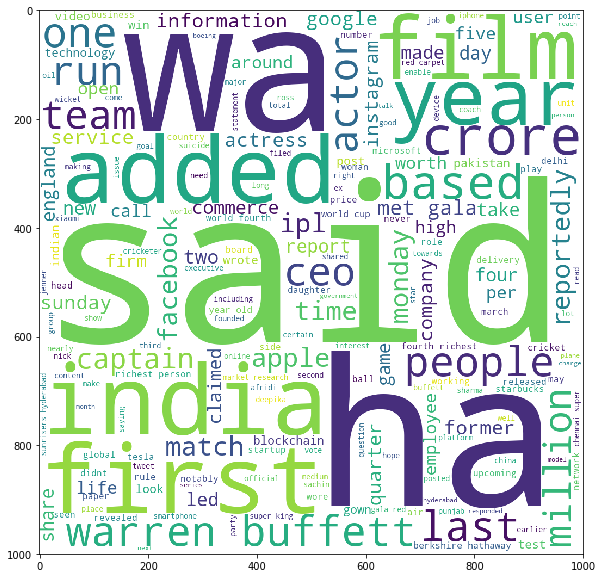

In [34]:
all_news_cloud = WordCloud(background_color='white', height=1000, width=1000).generate(all_news)
plt.figure(figsize=(10, 10))
plt.imshow(all_news_cloud)

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


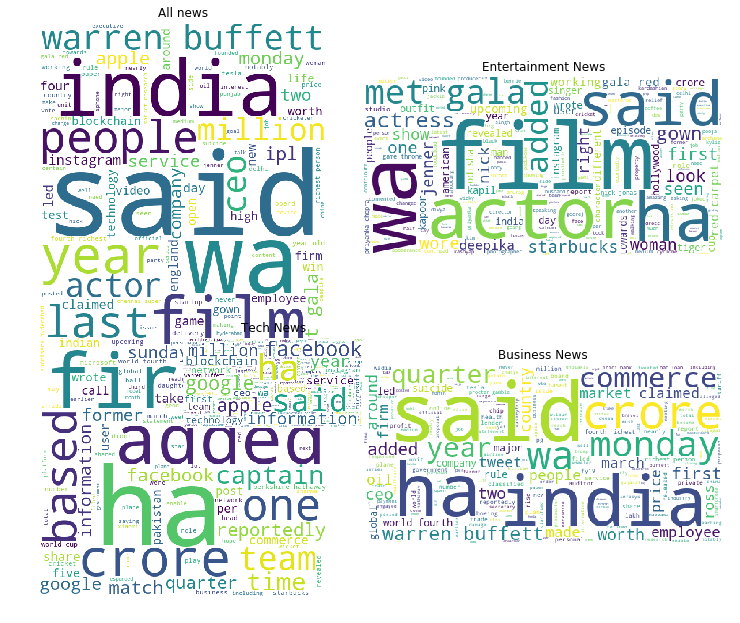

In [35]:
all_news_cloud = WordCloud(background_color='white', height=1000, width=500).generate(all_news)
tech_cloud = WordCloud(background_color='white', height=250, width=500).generate(tech_news)
sports_cloud = WordCloud(background_color='white', height=250, width=500).generate(sports_news)
ent_cloud = WordCloud(background_color='white', height=250, width=500).generate(ent_news)
bus_cloud = WordCloud(background_color='white', height=250, width=500).generate(bus_news)

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([0.25, .25, 0.25, 0.25]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_news_cloud)
axs[1].imshow(tech_cloud)
axs[2].imshow(sports_cloud)
axs[3].imshow(ent_cloud)
axs[4].imshow(bus_cloud)

axs[0].set_title('All news')
axs[1].set_title('Tech News')
axs[2].set_title('Sports News')
axs[3].set_title('Entertainment News')
axs[4].set_title('Business News')

for ax in axs: ax.axis('off')

In [36]:
top_20_tech_bigrams = (pd.Series(nltk.ngrams(tech_news.split(), 2))
                      .value_counts()
                      .head(20))
top_20_bus_bigrams = (pd.Series(nltk.ngrams(bus_news.split(), 2))
                      .value_counts()
                      .head(20))
top_20_sports_bigrams = (pd.Series(nltk.ngrams(sports_news.split(), 2))
                      .value_counts()
                      .head(20))
top_20_ent_bigrams = (pd.Series(nltk.ngrams(ent_news.split(), 2))
                      .value_counts()
                      .head(20))

In [37]:
top_20_tech_bigrams

(berkshire, hathaway)       4
(co, founder)               3
(warren, buffett)           3
(sharing, platform)         2
(iron, ox)                  2
(video, sharing)            2
(blockchain, technology)    2
(ha, said)                  2
(air, force)                2
(warren, buffetts)          2
(ha, unveiled)              2
(last, year)                2
(hathaway, ceo)             2
(sapphire, glass)           2
(ha, revealed)              2
(microsoft, ha)             2
(u, air)                    2
(instagram, said)           2
(facebook, ha)              2
(social, medium)            2
dtype: int64

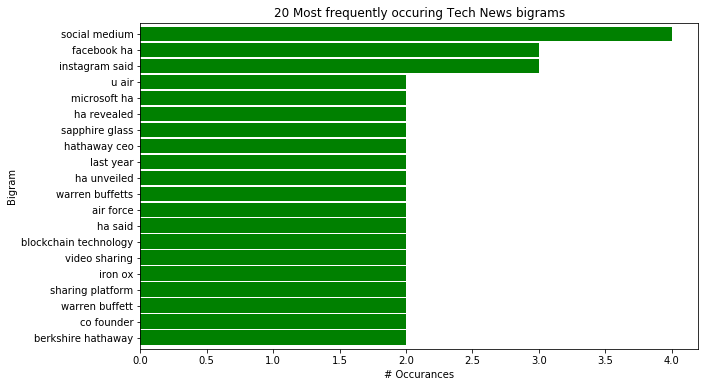

In [38]:
top_20_tech_bigrams.sort_values().plot.barh(color='green', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Tech News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_tech_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

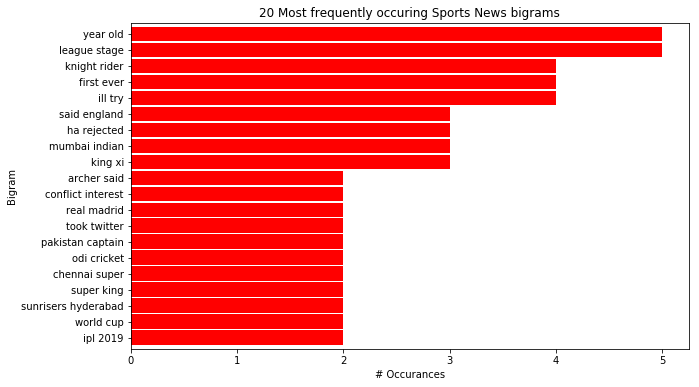

In [39]:
top_20_sports_bigrams.sort_values().plot.barh(color='red', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Sports News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_sports_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

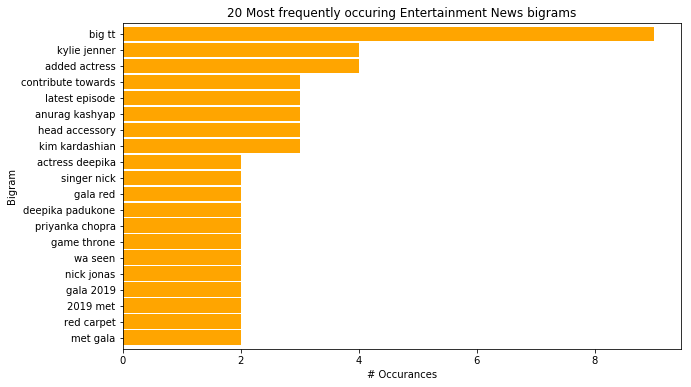

In [40]:
top_20_ent_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Entertainment News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ent_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

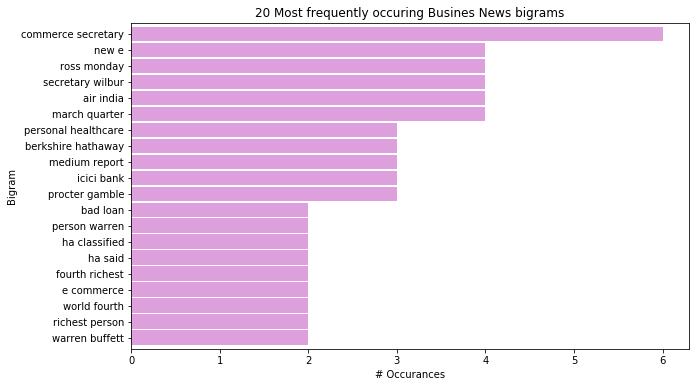

In [41]:
top_20_bus_bigrams.sort_values().plot.barh(color='plum', width=.9, figsize=(10, 6))
plt.title('20 Most frequently occuring Busines News bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_bus_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

(-0.5, 799.5, 399.5, -0.5)

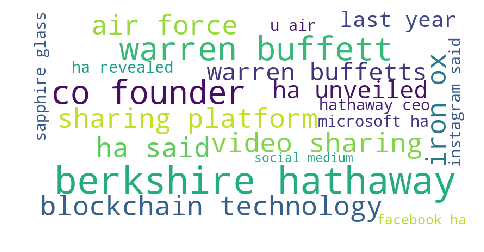

In [42]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_tech_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

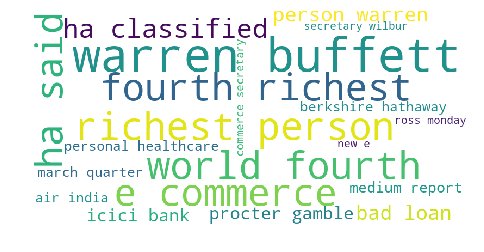

In [43]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_bus_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

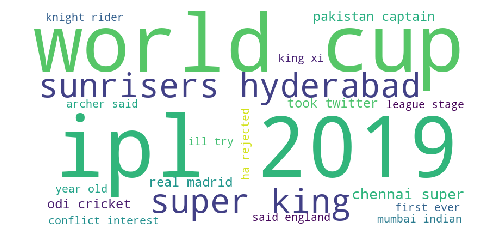

In [44]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_sports_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

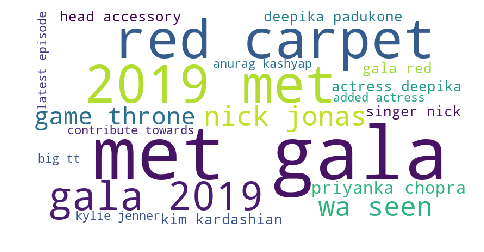

In [45]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ent_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')

In [47]:
df_blog.head()

,content,title
0,rumor true time ha arrived codeup ha officiall...,Codeup’s Data Science Career Accelerator is Here!
1,dimitri antoniou maggie giust data science big...,Data Science Myths
2,dimitri antoniou week ago codeup launched imme...,Data Science VS Data Analytics: What’s The Dif...
3,10 tip crush sa tech job fair sa tech job fair...,10 Tips to Crush It at the SA Tech Job Fair
4,xa0 programming bootcamp model danger recent n...,Competitor Bootcamps Are Closing. Is the Model...


In [51]:
all_blog = pd.Series(' '.join(df_blog.content).split())
all_blog_freq = pd.Series(' '.join(df_blog.content).split()).value_counts()

In [70]:
blog_word_counts = pd.DataFrame(all_blog_freq.sort_values(ascending=False))
blog_word_counts.columns = ['num_occur']
blog_word_counts['word'] = blog_word_counts.index
top_blog_word_counts = blog_word_counts.head(20)
top_blog_word_counts

,num_occur,word
data,78,data
science,29,science
learning,20,learning
company,20,company
job,16,job
machine,14,machine
scientist,13,scientist
like,12,like
model,11,model
fair,10,fair


In [67]:
import seaborn as sns

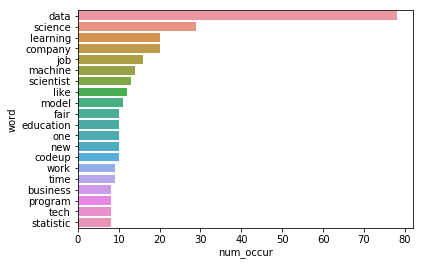

In [74]:
sns.barplot(y = top_blog_word_counts.word, x=top_blog_word_counts.num_occur)